# Елисеев Е.В. 
# Задача 2 "Спрос на бронирование отелей"

Данные содержат сведения о спросе на отели.Датасет содержит 119 390 наблюдений. Каждое наблюдение представляет собой бронирование отеля. Набор данных учитывает бронирования, которые должны прибыть в период с 1 июля 2015 года по 31 августа 2017 года, включая фактически поступившие и отмененные бронирования.

Данные содержат сведения о **70 146** отелях.
- Тренировочный набор - **44 634 строк**.
- Тестовый набор - **25 512 строк**.

In [1]:
# иморитирование всех необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

In [2]:
# Считываем тренировочные данные
train = pd.read_csv("data/train_final.csv.zip")

print(f"Train dataset shape: {train.shape}")

Train dataset shape: (44638, 29)


In [3]:
# Считываем тестовые данные
test = pd.read_csv("data/test_final.csv.zip")

print(f"Test dataset shape: {test.shape}")

Test dataset shape: (23525, 28)


In [4]:
# Посмотрим как выглядят данные
train.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,3,2016,February,7,12,0,2,2,...,E,F,0,No Deposit,0,Transient,81.0,1,0,2016-02-14
1,City Hotel,1,50,2016,November,47,18,1,2,2,...,A,A,0,No Deposit,0,Transient,93.6,0,2,2016-10-09
2,City Hotel,0,14,2015,September,37,7,1,5,2,...,F,F,0,No Deposit,0,Contract,166.0,0,3,2015-09-13
3,City Hotel,0,18,2015,December,50,6,2,0,2,...,A,A,0,No Deposit,0,Transient,107.0,0,0,2015-12-08
4,City Hotel,1,263,2016,September,40,29,2,4,2,...,A,A,0,No Deposit,0,Transient,100.3,0,0,2016-01-18


In [5]:
test.shape

(23525, 28)

## Исследование данных

In [6]:
print("Number of missing values in train dataset:")
print(train.isna().sum().sum())
print("Number of missing values in test dataset:")
print(test.isna().sum().sum())

Number of missing values in train dataset:
0
Number of missing values in test dataset:
0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44638 entries, 0 to 44637
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           44638 non-null  object 
 1   is_canceled                     44638 non-null  int64  
 2   lead_time                       44638 non-null  int64  
 3   arrival_date_year               44638 non-null  int64  
 4   arrival_date_month              44638 non-null  object 
 5   arrival_date_week_number        44638 non-null  int64  
 6   arrival_date_day_of_month       44638 non-null  int64  
 7   stays_in_weekend_nights         44638 non-null  int64  
 8   stays_in_week_nights            44638 non-null  int64  
 9   adults                          44638 non-null  int64  
 10  children                        44638 non-null  float64
 11  babies                          44638 non-null  int64  
 12  meal                            

## Предобработка данных

### Кодирование признаков

In [8]:
# Выбрем признаки, которые являются категориальными (строковыми)
train.loc[:, train.dtypes == object]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,February,BB,PRT,Direct,Direct,E,F,No Deposit,Transient,2016-02-14
1,City Hotel,November,BB,BEL,Online TA,TA/TO,A,A,No Deposit,Transient,2016-10-09
2,City Hotel,September,BB,ITA,Online TA,TA/TO,F,F,No Deposit,Contract,2015-09-13
3,City Hotel,December,BB,ESP,Online TA,TA/TO,A,A,No Deposit,Transient,2015-12-08
4,City Hotel,September,BB,DEU,Online TA,TA/TO,A,A,No Deposit,Transient,2016-01-18
...,...,...,...,...,...,...,...,...,...,...,...
44633,City Hotel,June,BB,JPN,Online TA,TA/TO,D,D,No Deposit,Transient,2017-06-28
44634,Resort Hotel,September,BB,GBR,Online TA,TA/TO,E,F,No Deposit,Transient,2015-10-03
44635,City Hotel,April,SC,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,2017-02-09
44636,City Hotel,September,HB,NOR,Offline TA/TO,TA/TO,A,A,No Deposit,Transient-Party,2016-09-12


In [9]:
# Удалим категории, которые могут иметь слишком много значений, либо некоторые значения могут иметь небольшую частоту

train = train.drop(columns=['reservation_status_date', 'country', 'assigned_room_type', 'reserved_room_type'])
test = test.drop(columns=['reservation_status_date', 'country', 'assigned_room_type', 'reserved_room_type'])

category_columns = train.loc[:, train.dtypes == object].columns
category_columns

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'deposit_type', 'customer_type'],
      dtype='object')

In [10]:
for col in category_columns:
    print(train[col].value_counts(),'\n')

hotel
City Hotel      29335
Resort Hotel    15303
Name: count, dtype: int64 

arrival_date_month
August       5232
July         4712
May          4336
October      4207
April        4118
June         4100
September    3826
March        3678
February     3106
November     2577
December     2483
January      2263
Name: count, dtype: int64 

meal
BB           34424
HB            5479
SC            4038
Undefined      445
FB             252
Name: count, dtype: int64 

market_segment
Online TA        21325
Offline TA/TO     9085
Groups            6868
Direct            4922
Corporate         2046
Complementary      308
Aviation            84
Name: count, dtype: int64 

distribution_channel
TA/TO        36298
Direct        5722
Corporate     2535
GDS             83
Name: count, dtype: int64 

deposit_type
No Deposit    40235
Non Refund     4339
Refundable       64
Name: count, dtype: int64 

customer_type
Transient          32982
Transient-Party     9826
Contract            1594
Group       

In [11]:
train['is_canceled'].value_counts()

is_canceled
0    31354
1    13284
Name: count, dtype: int64

In [12]:
# Использую балансировку upsampling

rat = len(train.loc[train['is_canceled'] == 0]) // len(train.loc[train['is_canceled'] == 1])
rat

2

In [13]:
df_1 = train.loc[train['is_canceled'] == 1]
df_1 = df_1.loc[df_1.index.repeat(rat)]
my_balance_train = pd.concat([train.loc[train['is_canceled'] == 0], df_1]).sample(frac=1)
my_balance_train['is_canceled'].value_counts()

is_canceled
0    31354
1    26568
Name: count, dtype: int64

In [14]:
from sklearn import preprocessing

for col in category_columns:
    le = preprocessing.LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])
    my_balance_train[col] = le.transform(my_balance_train[col])

train.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,1,0,3,2016,3,7,12,0,2,2,...,0,0,0,0,0,0,2,81.0,1,0
1,0,1,50,2016,9,47,18,1,2,2,...,0,0,0,0,0,0,2,93.6,0,2
2,0,0,14,2015,11,37,7,1,5,2,...,0,0,0,0,0,0,0,166.0,0,3
3,0,0,18,2015,2,50,6,2,0,2,...,0,0,0,0,0,0,2,107.0,0,0
4,0,1,263,2016,11,40,29,2,4,2,...,0,0,0,0,0,0,2,100.3,0,0


## Обучение модели

In [15]:
# Без балансировки

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

X = train.drop(columns=['is_canceled'])
y = train['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_1 = LogisticRegression()

model_1.fit(X_train, y_train)

y_pred = model_1.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

Accuracy: 0.7833034647550776
Precision: 0.7290296052631579
Recall: 0.4414840637450199


d:\WorkData\SusuRepos\workshop-projects\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# С балансировкой smote

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

X = train.drop(columns=['is_canceled'])
y = train['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)

model_2 = LogisticRegression()

smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print(X_resampled.shape)
print(y_resampled.shape)

model_2.fit(X_resampled, y_resampled)

y_pred = model_2.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

(31246, 24)
(31246,)
(43956, 24)
(43956,)
Accuracy: 0.6981033452807647
Precision: 0.4973059269606865
Recall: 0.6205179282868526


d:\WorkData\SusuRepos\workshop-projects\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# С балансировкой upsampling

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

X = my_balance_train.drop(columns=['is_canceled'])
y = my_balance_train['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_3 = LogisticRegression()

model_3.fit(X_train, y_train)

y_pred = model_3.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

Accuracy: 0.7137595672440582
Precision: 0.7109938922820656
Recall: 0.6391315198402795


d:\WorkData\SusuRepos\workshop-projects\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# С балансировкой upsampling и балансировкой smote

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

X = my_balance_train.drop(columns=['is_canceled'])
y = my_balance_train['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)

model_4 = LogisticRegression()

smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print(X_resampled.shape)
print(y_resampled.shape)

model_4.fit(X_resampled, y_resampled)

y_pred = model_4.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

(40545, 24)
(40545,)
(43982, 24)
(43982,)
Accuracy: 0.7085227599700754
Precision: 0.6746417150302025
Recall: 0.7107561766907912


d:\WorkData\SusuRepos\workshop-projects\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


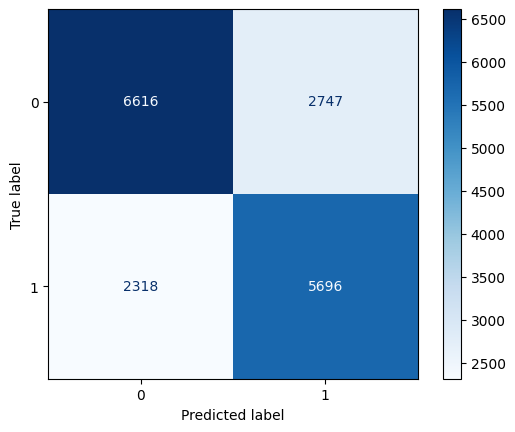

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Предсказание ответа для тестового набора данных

In [23]:
# Accuracy лучше у модели c upsampling, возьмем ее

y_pred_test = model_3.predict(test)

In [24]:
y_pred_test

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [26]:
y_pred_test = pd.DataFrame(y_pred_test, columns=['is_canceled'])
y_pred_test = y_pred_test.reset_index(drop=True)

y_pred_test.to_csv("predict.csv", index=False)